In [1]:
!python3 -m pip install xarray
!python3 -m pip install plotly
!python3 -m pip install geopandas
!python3 -m pip install rasterstats
!python3 -m pip install affine

In [2]:
%matplotlib inline
%qtconsole

import os
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.basemap import Basemap
import plotly.plotly as py
py.sign_in('ctasich', 'fpoe1n01ek')

from datetime import datetime, timedelta
from scipy import stats

import geopandas as gpd
from shapely.geometry import Point, shape
from utilities import hydroshare
import rasterstats as rs
from rasterio import features
from affine import Affine

import glob # check folder for similar file formats

In [3]:
## Load Data

# GRACE data
nc = 'https://opendap.jpl.nasa.gov:443/opendap/GeodeticsGravity/tellus/L3/mascon/RL05/JPL/CRI/netcdf/GRCTellus.JPL.200204_201701.GLO.RL05M_1.MSCNv02CRIv02.nc'
grace = xr.open_dataset(nc)

# Well data
#csv = 'https://www.hydroshare.org/django_irods/download/d3659dcf575d4090801a74d1ce096d7c/data/contents/WPDx_Well_Function_Upd_151224_xy161117.csv'
csv = os.path.join('/home/jovyan/work/notebooks/haackwell','dat','well-data-2001-2015-no-rainwater.csv')
wells = pd.read_csv(csv)

In [4]:
hs=hydroshare.hydroshare()
hs.getResourceFromHydroShare('bf7b1abb7ec14599b644116d20efebd5')

Adding the following system variables:
   HS_USR_NAME = jphuong
   HS_RES_ID = bf7b1abb7ec14599b644116d20efebd5
   HS_RES_TYPE = compositeresource
   JUPYTER_HUB_IP = jupyter.cuahsi.org

These can be accessed using the following command: 
   os.environ[key]

   (e.g.)
   os.environ["HS_USR_NAME"]  => jphuong
Successfully established a connection with HydroShare
This resource already exists in your userspace.
Would you like to overwrite this data [Y/n]? n


In [5]:
# map the Kenyan shapefile path
kenp = hs.content['KEN_adm1.shp']
print(kenp)

# map the parent directory for the shapefiles
HW2017 = os.path.join(kenp, os.pardir)
print(HW2017)

../../data/bf7b1abb7ec14599b644116d20efebd5/bf7b1abb7ec14599b644116d20efebd5/data/contents/KEN_adm1.shp
../../data/bf7b1abb7ec14599b644116d20efebd5/bf7b1abb7ec14599b644116d20efebd5/data/contents/KEN_adm1.shp/..


In [6]:
# retrieve the shapefile for kenya
# country boundary
Ken=gpd.read_file(kenp)
Ken

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,118,KEN,Kenya,1,Baringo,KE.BA,30,None,County,County,None,None,(POLYGON ((35.67241287231445 1.073058485984859...
1,118,KEN,Kenya,2,Bomet,KE.BO,36,None,County,County,None,None,POLYGON ((35.47388458251964 -0.395235478877907...
2,118,KEN,Kenya,3,Bungoma,KE.BN,39,None,County,County,None,None,"POLYGON ((34.61786651611339 1.108357429504508,..."
3,118,KEN,Kenya,4,Busia,KE.BS,40,None,County,County,None,None,"POLYGON ((34.3676567077639 0.7769606113433269,..."
4,118,KEN,Kenya,5,Elgeyo-Marakwet,KE.EM,28,None,County,County,None,None,(POLYGON ((35.46704483032249 1.007656216621456...
5,118,KEN,Kenya,6,Embu,KE.EB,14,None,County,County,None,None,(POLYGON ((37.31633377075212 -0.15351638197898...
6,118,KEN,Kenya,7,Garissa,KE.GA,7,None,County,County,None,None,"POLYGON ((39.5841064453125 0.7246704101563637,..."
7,118,KEN,Kenya,8,Homa Bay,KE.HB,43,None,County,County,None,None,POLYGON ((34.76070404052763 -0.308018475770950...
8,118,KEN,Kenya,9,Isiolo,KE.IS,11,None,County,County,None,None,"POLYGON ((38.96176147460943 2.099157094955558,..."
9,118,KEN,Kenya,10,Kajiado,KE.KJ,34,None,County,County,None,None,"POLYGON ((36.5361900329591 -1.152136445045414,..."


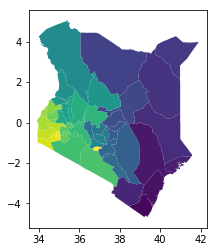

In [7]:
Ken.plot('CCN_1')

In [8]:
# read many shape file in the folder
gdfs = {} # load the empty dictionary 

# loop through the adm2 shapfile
for fname in glob.glob(os.path.abspath(os.path.join(HW2017,'*_adm2.shp'))):
    print(os.path.basename(fname).split('.')[0])
    gdfs[os.path.basename(fname).split('.')[0]] = gpd.read_file(fname)

UGA_adm2
KEN_adm2
TZA_adm2


In [9]:
# compile each dataframe into a single, long dataframe
dfs_all = pd.concat([gdf for gdf in gdfs.values()])

# convert the geodataframe to a epsg:4326 projection
gdfs_all = gpd.GeoDataFrame(dfs_all, crs={'init': 'epsg:4326'})

# print the gdfs geometry
print(len(gdfs_all['geometry']))
gdfs_all['geometry'].tail()

658


168    POLYGON ((34.20303344726557 0.7100309729578953...
169    (POLYGON ((32.34791564941435 -0.01791699975728...
170    (POLYGON ((32.43347167968756 -0.00652799988159...
171    (POLYGON ((32.62902832031256 0.219026997685432...
172    POLYGON ((31.21248245239263 3.797919988632316,...
Name: geometry, dtype: object

In [10]:
# look at all annotations available for each adm2 shape
gdfs_all.tail()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
168,239,UGA,Uganda,56,Tororo,158,Tororo,UG.TR.TR,0,2123,Municipality,Municipality,None,None,POLYGON ((34.20303344726557 0.7100309729578953...
169,239,UGA,Uganda,57,Wakiso,159,Busiiro,UG.WA.BS,0,1131,County,County,None,Busiro,(POLYGON ((32.34791564941435 -0.01791699975728...
170,239,UGA,Uganda,57,Wakiso,160,Entebbe,UG.WA.ET,0,1132,County,County,None,Entebbe Municipality,(POLYGON ((32.43347167968756 -0.00652799988159...
171,239,UGA,Uganda,57,Wakiso,161,Jinja,UG.WA.KA,0,1133,County,County,None,Kyadondo,(POLYGON ((32.62902832031256 0.219026997685432...
172,239,UGA,Uganda,58,Yumbe,162,Aringa,UG.YU.AR,0,3131,County,County,None,None,"POLYGON ((31.21248245239263 3.797919988632316,..."


In [11]:
# consider the NAME_1 for each adm2 polygon
gdfs_all.groupby('NAME_1').NAME_1.count().sort_values(ascending=False)

NAME_1
Nairobi                       17
Kiambu                        12
Bungoma                       11
Kakamega                      11
Nakuru                        11
Mbeya                         11
Meru                          10
Tanga                         10
Machakos                       9
Arusha                         9
Kagera                         9
Homa Bay                       9
Kigoma                         9
Kisii                          9
Kitui                          8
Mara                           8
Mbarara                        8
Mwanza                         8
Migori                         8
Busia                          8
Kilifi                         7
Murang'a                       7
Morogoro                       7
Mtwara                         7
Dodoma                         7
Kilimanjaro                    7
Pwani                          7
Kisumu                         7
Manyara                        7
Mandera                        7
   

In [12]:
# abstract the centroids for the adm2 polygons
centroidseries = gdfs_all['geometry'].centroid

# convert the centroids into a geodataframe
gdf = gpd.GeoDataFrame(centroidseries.reset_index()).rename(columns={'index':'shape_index', 0:'adm2_centroid'})
gdf['NAME_1'] = list(gdfs_all['NAME_1'])

# extract the longitude and latitude coordinate values into two columns
gdf['LONG'] = gdf.adm2_centroid.map(lambda x: x.x)
gdf['LAT'] = gdf.adm2_centroid.map(lambda x: x.y)
gdf.tail()

,shape_index,adm2_centroid,NAME_1,LONG,LAT
653,168,POINT (34.18232736502127 0.6869608731173628),Tororo,34.182327,0.686961
654,169,POINT (32.39446927849267 0.2975896027786319),Wakiso,32.394469,0.297590
655,170,POINT (32.45449148789957 0.058473309142768),Wakiso,32.454491,0.058473
656,171,POINT (32.57309420410004 0.4430942895145953),Wakiso,32.573094,0.443094
657,172,POINT (31.28769694030997 3.523789485223069),Yumbe,31.287697,3.523789


In [13]:
# check the raster file (here use grace as example)
grace

<xarray.Dataset>
Dimensions:        (lat: 360, lon: 720, time: 159)
Coordinates:
  * lon            (lon) float64 0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 ...
  * lat            (lat) float64 -89.75 -89.25 -88.75 -88.25 -87.75 -87.25 ...
  * time           (time) datetime64[ns] 2002-04-16 2002-05-10 ...
Data variables:
    lwe_thickness  (time, lat, lon) float64 ...
    uncertainty    (time, lat, lon) float64 ...
Attributes:
    Conventions:                CF-1.5
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    standard_name_vocabulary:   CF-1.5
    title:                      JPL RL05M.1-CRI
    summary:                    Monthly gravity solutions from GRACE as deter...
    filename:                   NETCDF/OFFICIAL_V2/GRCTellus.JPL.200204_20170...
    variable:                   liquid_water_equivalent_thickness
    platform:                   GRACE
    instrument:                 GRACE
    institution:                JPL
    creator_name:               David Wiese

In [14]:
#thickness_variable
gw = grace['lwe_thickness']
gw.coords

Coordinates:
  * lon      (lon) float64 0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75 ...
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 -87.75 -87.25 -86.75 ...
  * time     (time) datetime64[ns] 2002-04-16 2002-05-10 2002-08-16T12:00:00 ...

In [15]:
# generate a dictionary containing the indices and their corresponding datapoint
pgw=dict()

for ind, eachrow in gdf.iterrows():
    pgw[ind] = gw.sel(lon=eachrow['LONG'], lat=eachrow['LAT'], method='nearest')
    print(ind)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

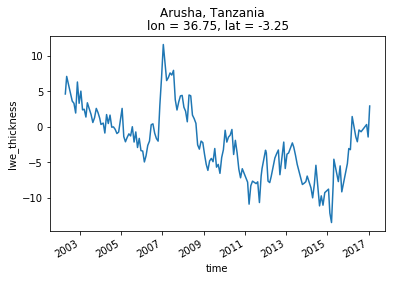

In [34]:
# look at a sample of the lwe_thickness xarray matrix
pgw[0].plot()
plt.suptitle('Arusha, Tanzania')
plt.show()

#fig = plt.figure()
#tmp = plt.plot(pgw[0])
#plt.title('Baringo, Kenya')
#pd.datetime(pgw[0])
#plt.savefig('Baringo_grace.png')

In [29]:
gdf.loc[0,:]

shape_index                                                 0
adm2_centroid    POINT (36.67536429201196 -3.437963753556593)
NAME_1                                                 Arusha
LONG                                                  36.6754
LAT                                                  -3.43796
Name: 0, dtype: object

In [32]:
gdfs_all.loc[gdfs_all['NAME_1']=='Busia',]

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
23,118,KEN,Kenya,4,Busia,24,Budalangi,None,231,None,Constituency,Constituency,None,None,POLYGON ((33.96736526489269 0.1840639412405949...
24,118,KEN,Kenya,4,Busia,25,Butula,None,229,None,Constituency,Constituency,None,None,POLYGON ((34.33878326416044 0.4291679859163651...
25,118,KEN,Kenya,4,Busia,26,Funyula,None,230,None,Constituency,Constituency,None,None,POLYGON ((34.11794281005888 0.3671718239787083...
26,118,KEN,Kenya,4,Busia,27,Matayos,None,228,None,Constituency,Constituency,None,None,POLYGON ((34.22062683105486 0.4741161465645973...
27,118,KEN,Kenya,4,Busia,28,Nambale,None,227,None,Constituency,Constituency,None,None,"POLYGON ((34.3231124877932 0.6180617213250343,..."
28,118,KEN,Kenya,4,Busia,29,Teso North,None,225,None,Constituency,Constituency,None,None,(POLYGON ((34.22027587890631 0.632578015327624...
29,118,KEN,Kenya,4,Busia,30,Teso South,None,226,None,Constituency,Constituency,None,None,POLYGON ((34.22230148315435 0.6297621726990315...
21,239,UGA,Uganda,7,Busia,21,Samia-Bugwe,UG.BU.BG,0,2021,County,County,None,None,POLYGON ((34.06796646118164 0.5951640009881771...


In [17]:
# get the geometry of the country admin (a list of shapes)
shapes = [(shape, n) for n, shape in enumerate(Ken.geometry)]
shapes[:10]

[(<shapely.geometry.multipolygon.MultiPolygon at 0x7f179027e160>, 0),
 (<shapely.geometry.polygon.Polygon at 0x7f179027e4e0>, 1),
 (<shapely.geometry.polygon.Polygon at 0x7f179027e860>, 2),
 (<shapely.geometry.polygon.Polygon at 0x7f179027ebe0>, 3),
 (<shapely.geometry.multipolygon.MultiPolygon at 0x7f1790337128>, 4),
 (<shapely.geometry.multipolygon.MultiPolygon at 0x7f1792b1d6a0>, 5),
 (<shapely.geometry.polygon.Polygon at 0x7f179033d320>, 6),
 (<shapely.geometry.polygon.Polygon at 0x7f179033d668>, 7),
 (<shapely.geometry.polygon.Polygon at 0x7f179033d9e8>, 8),
 (<shapely.geometry.polygon.Polygon at 0x7f179033dd68>, 9)]

In [18]:
Ken

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,118,KEN,Kenya,1,Baringo,KE.BA,30,None,County,County,None,None,(POLYGON ((35.67241287231445 1.073058485984859...
1,118,KEN,Kenya,2,Bomet,KE.BO,36,None,County,County,None,None,POLYGON ((35.47388458251964 -0.395235478877907...
2,118,KEN,Kenya,3,Bungoma,KE.BN,39,None,County,County,None,None,"POLYGON ((34.61786651611339 1.108357429504508,..."
3,118,KEN,Kenya,4,Busia,KE.BS,40,None,County,County,None,None,"POLYGON ((34.3676567077639 0.7769606113433269,..."
4,118,KEN,Kenya,5,Elgeyo-Marakwet,KE.EM,28,None,County,County,None,None,(POLYGON ((35.46704483032249 1.007656216621456...
5,118,KEN,Kenya,6,Embu,KE.EB,14,None,County,County,None,None,(POLYGON ((37.31633377075212 -0.15351638197898...
6,118,KEN,Kenya,7,Garissa,KE.GA,7,None,County,County,None,None,"POLYGON ((39.5841064453125 0.7246704101563637,..."
7,118,KEN,Kenya,8,Homa Bay,KE.HB,43,None,County,County,None,None,POLYGON ((34.76070404052763 -0.308018475770950...
8,118,KEN,Kenya,9,Isiolo,KE.IS,11,None,County,County,None,None,"POLYGON ((38.96176147460943 2.099157094955558,..."
9,118,KEN,Kenya,10,Kajiado,KE.KJ,34,None,County,County,None,None,"POLYGON ((36.5361900329591 -1.152136445045414,..."


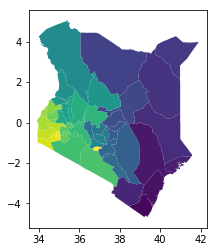

In [19]:
Ken.plot('CCN_1')

In [20]:
# get the well coordinate
wells['coord'] = wells.apply(lambda x: Point(x['LONG_DD'], x['LAT_DD']), axis=1)
wells.tail()

,WELL_ID,LAT_DD,LONG_DD,FUNC,STATUS,COD_FCN,COD_QTY,COD_RESRCE,ADM1,ADM2,...,WATERSRC,WATERTECH,INSTALLED,MGMT,PAY,SOURCE,RPT_DATE,RPT_YEAR,BKDWN_YEAR,coord
17336,484333,7.597172,5.230582,missing,missing,999,1,0,NaN,NaN,...,Not recorded,Unprotected dug well,0,NaN,NaN,mWater,2014-06-16,2014.0,2014.0,POINT (5.230582 7.597172)
17337,483321,-2.511946,32.900248,missing,missing,999,1,0,NaN,NaN,...,Not recorded,Bottled water,0,NaN,NaN,Mwanza,2014-03-09,2014.0,2014.0,POINT (32.900248 -2.511946)
17338,483841,7.408475,4.064835,missing,missing,999,1,0,NaN,NaN,...,Not recorded,Borehole or tubewell,0,NaN,NaN,mWater,2014-12-18,2014.0,2014.0,POINT (4.064835 7.408475)
17339,483900,7.408560,4.064823,missing,missing,999,1,0,NaN,NaN,...,Not recorded,Borehole or tubewell,0,NaN,NaN,mWater,2014-12-18,2014.0,2014.0,POINT (4.064823000000001 7.40856)
17340,490128,2.042674,32.745330,No,system is down for two years|Broken Parts|pipe...,0,1,0,Apac,Kwania,...,Protected Deep Borehole,Not recorded,1958,NaN,No payment system,Lifeline,2014-11-23,2014.0,2014.0,POINT (32.7453297 2.04267372)


In [21]:
# For each Kenyan polygon, operate through them to find all the wells that are directly part of them.
poly_dict=dict()

for mdx, eachpol in Ken.iterrows():
    print(mdx)
    poly_dict[eachpol['NAME_1']]=[]
    for ndx, eachwell in wells.iterrows():
        
        # if it intersects, append the id to the WELL_ID
        if eachpol['geometry'].intersects(eachwell['coord']):
            poly_dict[eachpol['NAME_1']].append(eachwell['WELL_ID'])
            
poly_dict

0
1
2
3
4
5
6
7
8
9
10
11


KeyboardInterrupt: 

In [ ]:
sorted(poly_dict.items(), key=lambda x: len(x[1]), reverse=True)

In [ ]:
wells['WELL_ID']

In [ ]:
# subset the wells to the ones that are within a particular administrative area of interest
temp = wells.loc[wells['WELL_ID'].isin(poly_dict['Busia']),:]
t2 = temp.pivot_table(index='RPT_DATE',columns='FUNC', values='WELL_ID', aggfunc=lambda x: x.count()).fillna(0)
t2 = t2.cumsum()

t2['nonfuncratio']=t2['No']/t2['Yes']
t2

In [ ]:
temp.groupby(['RPT_DATE','FUNC'])['FUNC'].count().cumsum()

In [ ]:
# look at the annotations for a single record
wells.loc[0,:]

In [ ]:
# grace_time_series
# .lwe_thickness
time_series=grace.sel(time=slice('2002-04-16', '2016-12-31'), lat=75.25, lon=180.25)
time_series

In [ ]:
gdfs.keys()

In [ ]:
# use the raster statistic to get the mean of GRACE values for each country 
# need to figure out the file path problem

# convert the xrray to raster

# file path
#ppt_july_tif_pth = os.path.join(nc, 'prism_precipitation_july_climatology.tif')

zonal_grace_af_gjson = rs.zonal_stats(gdfs['TZA_adm2'], grace, prefix='grace_', geojson_out=True)

zonal_faf_gdf = gpd.GeoDataFrame.from_features(zonal_grace_af_gjson)
zonal_faf_gdf.head(2)

In [ ]:
## Preprocess data

## Wells
wells['color'] = np.where(wells['FUNC']=='Yes', '#2ECC71', '#E74C3C')

## GRACE
rmap = grace['lwe_thickness'][0,:,:]

# Extract Lat/Lon Metadata
lat_min = grace.geospatial_lat_min
lat_max = grace.geospatial_lat_max
lat_res = float(grace.geospatial_lat_resolution[0:3])

lon_min = grace.geospatial_lon_min
lon_max = grace.geospatial_lon_max
lon_res = float(grace.geospatial_lon_resolution[0:3])

In [ ]:
## Plot GRACE data

# Build grid
lon_g = np.arange(lon_min,lon_max+lon_res,lon_res)
lat_g = np.arange(lat_min,lat_max+lat_res,lat_res)
x,y = np.meshgrid(lon_g[:], lat_g[:])

# Plot Fig
plt.figure(figsize=(20,10))
m = Basemap(projection='moll',llcrnrlat=-87,urcrnrlat=81,lon_0=0,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
# draw parallels and meridians.
parallels = np.arange(-89.75,89.75,30.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[False,True,True,False])
# Draw Meridians and Labels
meridians = np.arange(-180.,181.,30.)
m.drawmeridians(meridians)
m.drawmapboundary(fill_color='white')

ax = plt.gca()
masked_array = np.ma.array(rmap, mask=np.isnan(rmap))
cmap = matplotlib.cm.jet
cmap.set_bad('white',1.0)

im1 = m.pcolormesh(x,y,rmap,shading='flat',latlon=True);
im2 = m.pcolormesh(x,y,masked_array,shading='flat',latlon=True)
m.drawcoastlines();
cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.set_label('Water thickness equivalent (cm)')
plt.title('GRACE initial measurement',size=20);

In [ ]:
## Plot well data in plotly

data = [ dict(
    lat = wells.LAT_DD,
    lon = wells.LONG_DD,
    marker = dict(
        color = wells.color.tolist(),
        opacity = 0.7,
        size = 2,                
    ),
    type = 'scattergeo'
) ]

layout = dict(
    geo = dict(showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 10,
        projection = dict(
            type = 'utm'),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -20, 80 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ -20, 40 ],
            dtick = 5
        )
    ),
    title = 'Wells from WPDx',
)
fig = { 'data':data, 'layout':layout }
py.iplot(fig, filename='wells')

In [ ]:
# Code that subselects regions of interest. This is for all of Africa, but will be used later to get individual time series

data = xr.open_dataset('https://opendap.jpl.nasa.gov:443/opendap/GeodeticsGravity/tellus/L3/mascon/RL05/JPL/CRI/netcdf/GRCTellus.JPL.200204_201701.GLO.RL05M_1.MSCNv02CRIv02.nc')
af = xr.concat( [data['lwe_thickness'].sel(lat=slice(-37.75,37.75)).sel(lon=slice(340.25,359.75)),
                  data['lwe_thickness'].sel(lat=slice(-37.75,37.75)).sel(lon=slice(0.25,50.75))],
                  dim='lon')

lonaf = xr.concat( [data['lon'].sel(lon=slice(340.25,359.75)),
                  data['lon'].sel(lon=slice(0.25,50.75))],
                  dim='lon')

lataf = data['lat'].sel(lat=slice(-37.75,37.75))


In [ ]:
# Find nearest grid locations for all data
# lon_g and lat_g are the lons and lats of the gridded products, respectively
# nb this is only for Africa for now! Change things in the previous cell if you want to deal with the global GRACE dataset.

lon_g = lonaf
lat_g = lataf

xRes = np.median(np.diff(lon_g))
yRes = np.median(np.diff(lat_g))

# Define grid box centers
lon_c = lon_g[:-1]+xRes/2
lat_c = lat_g[:-1]+yRes/2

# Define a new metadata file that has grid coordinates for this resolution choice
wg = wells

wg.loc[:,'grid_lat'] = np.nan
wg.loc[:,'grid_lon'] = np.nan
wg.loc[:,'grace_mean'] = np.nan
wg.loc[:,'grace_std'] = np.nan
wg.loc[:,'grace_at_rpt_date'] = np.nan

## Determine grid_lat and grid_lon for every record

for index, row in wg.iterrows():
    lon_s = row[u'LONG_DD']
    lat_s = row[u'LAT_DD']
    # correct for wrapping
    if lon_s<0:
        lon_s = 360+lon_s
    glat = lat_g.values[np.argmin(np.abs(lat_c.values-lat_s))]
    glon = lon_g.values[np.argmin(np.abs(lon_c.values-lon_s))]
    wg.set_value(index,'grid_lat',glat)
    wg.set_value(index,'grid_lon',glon)

# Get all unique grid_lat and grid_lon pairs. Don't totally understand this bit of magic...
allpairs = wg[['grid_lat', 'grid_lon']].values
upairs = np.array(list(set(tuple(p) for p in allpairs)))

# GRACE at well locations. sel_points is necessary to get coordinate pairs.
wellG = data['lwe_thickness'].sel_points(lat=upairs[:,0],lon=upairs[:,1])




In [ ]:
# Loop through the dataframe again and compute stats!

for index, row in wg.iterrows():
    glat = row[u'grid_lat']
    glon = row[u'grid_lon']

    # get the corresponding point
    pt = wellG[(wellG['lat']==glat).values & (wellG['lon']==glon).values].points.values
    allhere = wellG.sel(points=pt)
    wg.set_value(index,'grace_mean',np.mean(allhere.values))
    wg.set_value(index,'grace_std',np.std(allhere.values))

    dda = row[u'RPT_DATE']
    dgr = allhere['time'].values
    best_gr_ind = np.argmin(np.abs(pd.to_datetime(dgr)-pd.to_datetime(dda)))

    wg.set_value(index,'grace_at_rpt_date',np.squeeze(allhere.values)[best_gr_ind])




In [ ]:
# Take a look
wg

In [ ]:
# Is there any relationship between GRACE and the well data?

# 1. Compare g_mean to g_rpt. Make 2 histograms, one for working and one for not. Anything there?


# differences between mean and report time GRACE values
d_mean_rpt_yes = wg[wg['FUNC']=='Yes' ]['grace_at_rpt_date']-wg[wg['FUNC']=='Yes']['grace_mean']
d_mean_rpt_no  = wg[wg['FUNC']=='No'  ]['grace_at_rpt_date']-wg[wg['FUNC']=='No' ]['grace_mean']

bins = np.arange(-40,40)

plt.hist(d_mean_rpt_yes,bins=bins,alpha=0.5,label='Not functioning')
plt.hist(d_mean_rpt_no ,bins=bins,alpha=0.5,label='Functioning')
plt.ylabel('Number of records')
plt.title('GRACE LWE at report dates for African sites minus 2002-2016 mean',size=12)
plt.legend(loc='upper right')
plt.xlabel('Anomaly in liquid water equivalent (cm)')
plt.show()

# 2. Histograms of g_std for working and not. Any difference?

d_std_yes = wg[wg['FUNC']=='Yes' ]['grace_std']
d_std_no  = wg[wg['FUNC']=='No'  ]['grace_std']

bins = np.arange(0,30)

plt.hist(d_std_yes,bins=bins,alpha=0.5,label='Not functioning')
plt.hist(d_std_no ,bins=bins,alpha=0.5,label='Functioning')
plt.ylabel('Number of records')
plt.title('GRACE standard deviation of LWE at African sites, 2002-2016')
plt.legend(loc='upper right')
plt.xlabel('Liquid water equivalent (cm)')
plt.show()

